In [41]:

import sys
from typing import List
from sklearn import tree

attr_file_name  = r"C:\Users\andre\OneDrive\Desktop\hw\CS 4375\Final Project\Decision Tree\attr.txt"
train_file_name = r"C:\Users\andre\OneDrive\Desktop\hw\CS 4375\Final Project\Decision Tree\train.txt"

attr_file = open(attr_file_name)
attr_names = []
attr_range = [] #ex continuous, discrete
for line in attr_file:
    l = line.split()
    attr_names.append(l[0])
class_range = attr_names.pop()

train_samples = []
class_samples = []
train_file = open(train_file_name)
for line in train_file:
    l = line.split()
    class_samples.append(int(l.pop()))
    for i in range(0, len(attr_names)):
        l[i] = float(l[i])
    train_samples.append(l)


clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(train_samples, class_samples)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

72.53333333333333


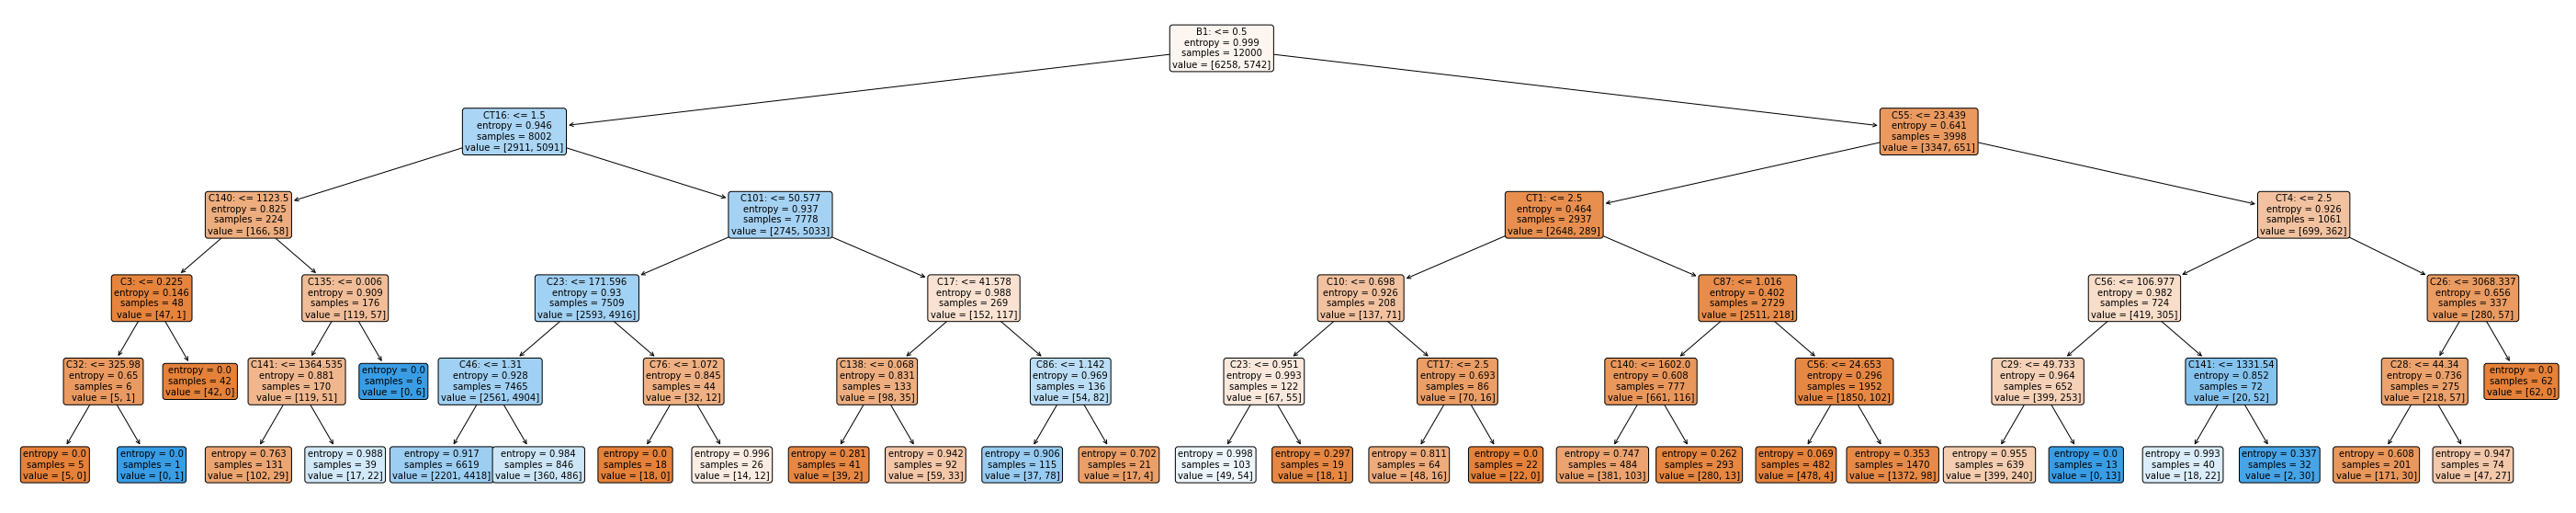

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=50,10
tree.plot_tree(clf, feature_names=attr_names, label='all',filled=True, rounded=True, max_depth=5, fontsize=10)



predict = clf.predict(train_samples)
num_correct = 0
for i in range(0, len(predict)):
    if predict[i] == class_samples[i]:
        num_correct+=1
print(float(num_correct)/len(class_samples)*100)

Accuracy when depth = 1: 70.31666666666668
Accuracy when depth = 2: 71.21666666666667
Accuracy when depth = 3: 71.50833333333333
Accuracy when depth = 4: 72.175
Accuracy when depth = 5: 72.35833333333333
Accuracy when depth = 6: 73.1
Accuracy when depth = 7: 73.81666666666666
Accuracy when depth = 8: 74.13333333333333
Accuracy when depth = 9: 74.4
Accuracy when depth = 10: 75.19166666666666
Accuracy when depth = 11: 75.625
Accuracy when depth = 12: 76.16666666666667
Accuracy when depth = 13: 76.55
Accuracy when depth = 14: 76.85833333333333
Accuracy when depth = 15: 76.97500000000001
Accuracy when depth = 16: 77.38333333333334
Accuracy when depth = 17: 77.46666666666667
Accuracy when depth = 18: 77.47500000000001
Accuracy when depth = 19: 77.49166666666667
Accuracy when depth = 20: 77.49166666666667
Accuracy when depth = 21: 77.49166666666667
Accuracy when depth = 22: 77.5
Accuracy when depth = 23: 77.5
Accuracy when depth = 24: 77.49166666666667
Accuracy when depth = 25: 77.4916666666

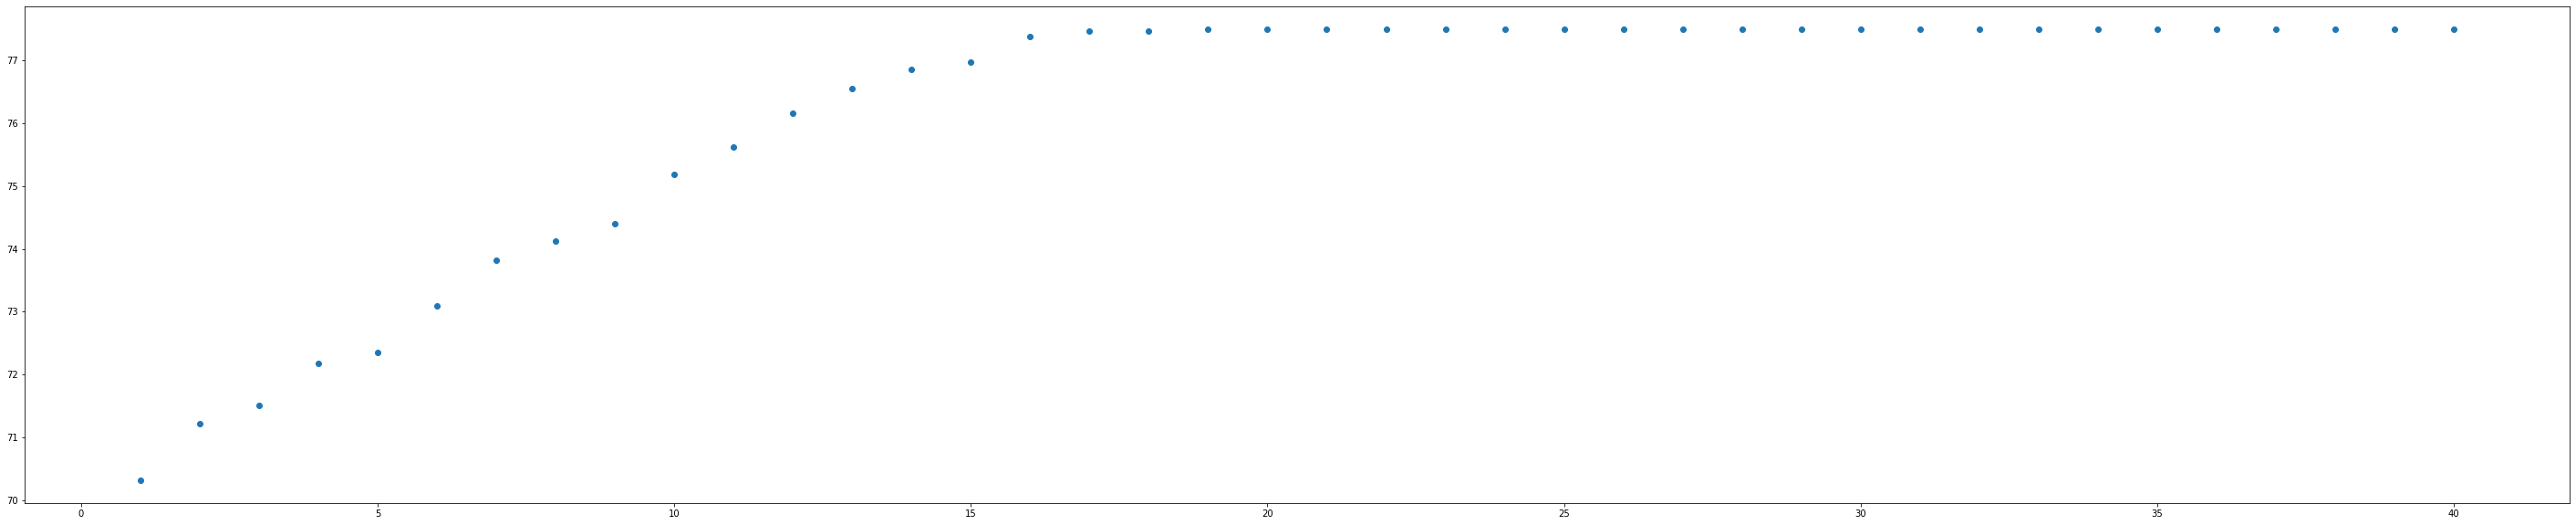

In [43]:
MAX_D = 40

accuracies = []
depth = []
MIN_SAMPLES_LEAF= 40
for d in range(1, MAX_D+1):
    clf  = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d, min_samples_leaf=MIN_SAMPLES_LEAF)
    clf.fit(train_samples, class_samples)

    predict = clf.predict(train_samples)
    num_correct = 0
    for i in range(0, len(predict)):
        if predict[i] == class_samples[i]:
            num_correct+=1
    print('Accuracy when depth = ' + str(d) + ': ' + str(float(num_correct)/len(class_samples)*100))
    accuracies.append(float(num_correct)/len(class_samples)*100)
    depth.append(d)
plt.scatter(depth, accuracies)
plt.show()

In [44]:
MIN_SAMPLES_LEAF= 50

class_cnts = [0,0]
for c in class_samples:
    class_cnts[c] += 1
print(class_cnts)

import math
#num_sample_each_class = int(math.floor(min(class_cnts)/2))
num_sample_each_class = 2000

clss_0_indices = []
clss_1_indices = []

for i in range(0, len(class_samples)):
    if class_samples[i] == 0:
        clss_0_indices.append(i)
    else:
        clss_1_indices.append(i)

import random as rand
rand.seed()
training_sample_indices = rand.sample(clss_0_indices, k=num_sample_each_class)
training_sample_indices.extend(rand.sample(clss_1_indices, k=num_sample_each_class))
print(len(training_sample_indices))
new_train_samples = [train_samples[i] for i in training_sample_indices]
test_samples = []
test_sample_indices = []
for i in range(0, len(train_samples)):
    if i not in training_sample_indices:
        test_sample_indices.append(i)
        test_samples.append(train_samples[i])

class_train_samples = []
for i in training_sample_indices:
    class_train_samples.append(class_samples[i])
class_test_samples = []
for i in test_sample_indices:
    class_test_samples.append(class_samples[i])
print(len(class_test_samples))

accuracies = []
depth = []
for d in range(1, MAX_D+1):
    clf  = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d, min_samples_leaf=MIN_SAMPLES_LEAF)
    clf.fit(new_train_samples, class_train_samples)

    predict = clf.predict(test_samples)
    num_correct = 0
    for i in range(0, len(class_test_samples)):
        if predict[i] == class_test_samples[i]:
            num_correct+=1
    print('Accuracy when depth = ' + str(d) + ': ' + str(float(num_correct)/len(class_test_samples)*100))
    accuracies.append(float(num_correct)/len(class_test_samples)*100)
    depth.append(d)

#depth around 5 good?

[6258, 5742]
4000
8000
Accuracy when depth = 1: 70.1
Accuracy when depth = 2: 70.7
Accuracy when depth = 3: 71.1
Accuracy when depth = 4: 71.35000000000001
Accuracy when depth = 5: 70.625
Accuracy when depth = 6: 69.19999999999999
Accuracy when depth = 7: 69.075
Accuracy when depth = 8: 69.075
Accuracy when depth = 9: 69.075
Accuracy when depth = 10: 69.075
Accuracy when depth = 11: 69.19999999999999
Accuracy when depth = 12: 68.5625
Accuracy when depth = 13: 68.85
Accuracy when depth = 14: 68.85
Accuracy when depth = 15: 67.825
Accuracy when depth = 16: 68.16250000000001
Accuracy when depth = 17: 68.16250000000001
Accuracy when depth = 18: 68.16250000000001
Accuracy when depth = 19: 68.2875
Accuracy when depth = 20: 67.8625
Accuracy when depth = 21: 68.16250000000001
Accuracy when depth = 22: 68.2875
Accuracy when depth = 23: 67.9875
Accuracy when depth = 24: 67.825
Accuracy when depth = 25: 68.2875
Accuracy when depth = 26: 68.2875
Accuracy when depth = 27: 68.16250000000001
Accuracy

In [45]:
# Find best features



In [46]:
# Random forest
MIN_SAMPLES_LEAF= 50

class_cnts = [0,0]
for c in class_samples:
    class_cnts[c] += 1
print(class_cnts)

import math
#num_sample_each_class = int(math.floor(min(class_cnts)/2))
num_sample_each_class = 2000

clss_0_indices = []
clss_1_indices = []

for i in range(0, len(class_samples)):
    if class_samples[i] == 0:
        clss_0_indices.append(i)
    else:
        clss_1_indices.append(i)

import random as rand
rand.seed()
training_sample_indices = rand.sample(clss_0_indices, k=num_sample_each_class)
training_sample_indices.extend(rand.sample(clss_1_indices, k=num_sample_each_class))
print(len(training_sample_indices))
new_train_samples = [train_samples[i] for i in training_sample_indices]
test_samples = []
test_sample_indices = []
for i in range(0, len(train_samples)):
    if i not in training_sample_indices:
        test_sample_indices.append(i)
        test_samples.append(train_samples[i])

class_train_samples = []
for i in training_sample_indices:
    class_train_samples.append(class_samples[i])
class_test_samples = []
for i in test_sample_indices:
    class_test_samples.append(class_samples[i])
print(len(class_test_samples))

from sklearn.ensemble import RandomForestClassifier

for d in range(1, MAX_D+1):
    clf = RandomForestClassifier(max_depth=d)
    clf.fit(new_train_samples, class_train_samples)

    predict = clf.predict(test_samples)
    num_correct = 0
    for i in range(0, len(class_test_samples)):
        if predict[i] == class_test_samples[i]:
            num_correct+=1
    print('Accuracy when depth = ' + str(d) + ': ' + str(float(num_correct)/len(class_test_samples)*100))

[6258, 5742]
4000
8000
Accuracy when depth = 1: 71.05
Accuracy when depth = 2: 71.3875
Accuracy when depth = 3: 71.675
Accuracy when depth = 4: 71.6875
Accuracy when depth = 5: 72.05
Accuracy when depth = 6: 72.4375
Accuracy when depth = 7: 72.98750000000001
Accuracy when depth = 8: 72.975
Accuracy when depth = 9: 72.6
Accuracy when depth = 10: 72.96249999999999
Accuracy when depth = 11: 72.625
Accuracy when depth = 12: 72.7625
Accuracy when depth = 13: 72.0125
Accuracy when depth = 14: 71.6125
Accuracy when depth = 15: 71.55
Accuracy when depth = 16: 71.22500000000001
Accuracy when depth = 17: 71.1875
Accuracy when depth = 18: 71.075
Accuracy when depth = 19: 71.26249999999999
Accuracy when depth = 20: 71.15
Accuracy when depth = 21: 70.8875
Accuracy when depth = 22: 71.0875
Accuracy when depth = 23: 71.05
Accuracy when depth = 24: 70.95
Accuracy when depth = 25: 70.0625
Accuracy when depth = 26: 70.78750000000001
Accuracy when depth = 27: 70.7125
Accuracy when depth = 28: 71.2
Accura

In [47]:
#Supporet vector machines

import math
#num_sample_each_class = int(math.floor(min(class_cnts)/2))
num_sample_each_class = 2000

clss_0_indices = []
clss_1_indices = []

for i in range(0, len(class_samples)):
    if class_samples[i] == 0:
        clss_0_indices.append(i)
    else:
        clss_1_indices.append(i)

import random as rand
rand.seed()
training_sample_indices = rand.sample(clss_0_indices, k=num_sample_each_class)
training_sample_indices.extend(rand.sample(clss_1_indices, k=num_sample_each_class))
print(len(training_sample_indices))
new_train_samples = [train_samples[i] for i in training_sample_indices]
test_samples = []
test_sample_indices = []
for i in range(0, len(train_samples)):
    if i not in training_sample_indices:
        test_sample_indices.append(i)
        test_samples.append(train_samples[i])

class_train_samples = []
for i in training_sample_indices:
    class_train_samples.append(class_samples[i])
class_test_samples = []
for i in test_sample_indices:
    class_test_samples.append(class_samples[i])
print(len(class_test_samples))

from sklearn import svm
clf = svm.SVC()
clf.fit(new_train_samples, class_train_samples)
predict = clf.predict(test_samples)
num_correct = 0
for i in range(0, len(class_test_samples)):
    if predict[i] == class_test_samples[i]:
        num_correct+=1
print('Accuracy = ' + str(float(num_correct)/len(class_test_samples)*100))

4000
8000
Accuracy = 51.81249999999999


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
import numpy as np
new_train_samples, test_samples, class_train_samples, class_test_samples = train_test_split(train_samples, class_samples, test_size=0.66)
clf = ComplementNB()
class_pred = clf.fit(new_train_samples, class_train_samples).predict(test_samples)
print("Accuracy = " + str(float((class_test_samples != class_pred).sum())/len(class_test_samples)*100))

Accuracy = 48.66161616161616
